In [2]:
#importacion de librerias
import math
import matplotlib.pyplot as plt

In [3]:
# Función sunae para calcular azimut y elevación
def sunae(year, day, hour, lat, long):
    pi = math.pi
    twopi = 2 * pi
    rad = pi / 180  # Conversión de grados a radianes

    delta = year - 1949
    leap = math.floor(delta / 4)
    jd = 32916.5 + delta * 365 + leap + day + hour / 24

    time = jd - 51545.0

    mnlong = 280.460 + 0.9856474 * time
    mnlong = mnlong % 360
    if mnlong < 0:
        mnlong += 360

    mnanom = 357.528 + 0.9856003 * time
    mnanom = mnanom % 360
    if mnanom < 0:
        mnanom += 360
    mnanom = mnanom * rad

    eclong = mnlong + 1.915 * math.sin(mnanom) + 0.020 * math.sin(2 * mnanom)
    eclong = eclong % 360
    if eclong < 0:
        eclong += 360
    oblqec = 23.439 - 0.0000004 * time
    eclong = eclong * rad
    oblqec = oblqec * rad

    num = math.cos(oblqec) * math.sin(eclong)
    den = math.cos(eclong)
    ra = math.atan2(num, den)
    if den < 0:
        ra += pi
    elif num < 0:
        ra += twopi

    dec = math.asin(math.sin(oblqec) * math.sin(eclong))

    gmst = 6.697375 + 0.0657098242 * time + hour
    gmst = gmst % 24
    if gmst < 0:
        gmst += 24

    lmst = gmst + long / 15
    lmst = lmst % 24
    if lmst < 0:
        lmst += 24
    lmst = lmst * 15 * rad

    ha = lmst - ra
    if ha < -pi:
        ha += twopi
    if ha > pi:
        ha -= twopi

    lat = lat * rad

    el = math.asin(math.sin(dec) * math.sin(lat) + math.cos(dec) * math.cos(lat) * math.cos(ha))
    az = math.atan2(-math.cos(dec) * math.sin(ha), math.cos(lat) * math.sin(dec) - math.sin(lat) * math.cos(dec) * math.cos(ha))

    if az < 0:
        az += twopi

    el_deg = el / rad
    if el_deg > -0.56:
        refrac = 3.51561 * (0.1594 + 0.0196 * el_deg + 0.00002 * el_deg**2) / (1 + 0.505 * el_deg + 0.0845 * el_deg**2)
    else:
        refrac = 0.56
    el = el_deg + refrac

    az = az / rad

    return az, el

In [6]:
# Ejemplo de uso con la Ciudad de México
year = 2024
day = 247  # 8 de agosto
lat = 19.4326  # Latitud de Ciudad de México
long = -99.1332  # Longitud de Ciudad de México
# Lista para guardar los azimuts y elevaciones
az_list = []
el_list = []

# Calcular la posición del Sol en intervalos de tiempo
for hour in range(0, 24):
    az, el = sunae(year, day, hour, lat, long)
    az_list.append(math.radians(az))
    el_list.append(90 - el)  # Convertir elevación para gráfico polar

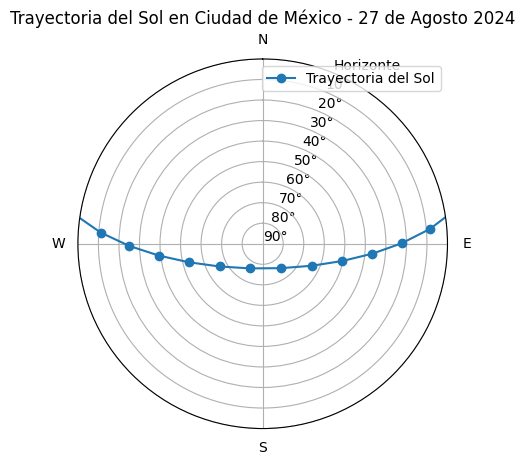

In [7]:
# Graficar la trayectoria
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.set_theta_direction(-1)  # Direccion del azimut
ax.set_theta_offset(math.pi / 2.0)  # 0 grados apunta al norte

ax.plot(az_list, el_list, marker='o', label='Trayectoria del Sol')

# Configuración de la gráfica
ax.set_ylim(0, 90)
ax.set_yticks(range(0, 91, 10))
ax.set_yticklabels(['90°', '80°', '70°', '60°', '50°', '40°', '30°', '20°', '10°', 'Horizonte'])
ax.set_xticks([0, math.pi/2, math.pi, 3*math.pi/2])
ax.set_xticklabels(['N', 'E', 'S', 'W'])
ax.set_title('Trayectoria del Sol en Ciudad de México - 27 de Agosto 2024')

plt.legend()
plt.show()